In [1]:
#import packages
import datetime as dat
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy.stats as stats
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [15]:

#load data
df = pd.read_csv('Data/january2017.csv')


#view data
df.head()

,dataid,1/1/2017,1/2/2017,1/3/2017,1/4/2017,1/5/2017,1/6/2017,1/7/2017,1/8/2017,1/9/2017,...,1/29/2017,1/30/2017,1/31/2017,building_type,pv,city,ageofhouse,total_square_footage,EV,appliances/outlets
0,59,43.438100,31.173767,36.804283,66.318250,70.238817,127.290567,131.520917,109.003317,56.061867,...,57.922783,46.934150,34.865817,1,0,1,11,2122.0,0,12
1,77,26.839217,38.902733,24.636817,49.594467,50.655100,99.481967,85.742817,69.858667,35.434700,...,41.711967,28.174733,28.306317,1,1,1,11,1439.0,0,11
2,86,38.706200,26.991150,25.693333,22.103867,29.290350,59.603933,45.522533,30.623717,18.483167,...,26.680267,16.572133,17.432633,1,1,1,12,1842.0,0,1
3,93,21.053867,19.916500,13.024533,13.784917,12.937867,16.484100,20.605800,19.075917,13.624133,...,14.800167,14.106650,13.967033,1,1,1,11,2075.0,1,1
4,94,25.915150,15.738583,11.901150,8.212717,8.167200,9.648217,19.352367,9.348167,10.631917,...,7.956367,7.650633,7.581800,1,1,1,11,1842.0,1,10


In [16]:
EV = df['EV'].value_counts()
EV
#lookat city

0    259
1     83
Name: EV, dtype: int64

In [17]:
df.isna().sum()

dataid                  0
1/1/2017                0
1/2/2017                0
1/3/2017                0
1/4/2017                0
1/5/2017                0
1/6/2017                0
1/7/2017                0
1/8/2017                0
1/9/2017                0
1/10/2017               0
1/11/2017               0
1/12/2017               0
1/13/2017               0
1/14/2017               0
1/15/2017               0
1/16/2017               0
1/17/2017               0
1/18/2017               0
1/19/2017               0
1/20/2017               0
1/21/2017               0
1/22/2017               0
1/23/2017               0
1/24/2017               0
1/25/2017               0
1/26/2017               0
1/27/2017               0
1/28/2017               0
1/29/2017               0
1/30/2017               0
1/31/2017               0
building_type           0
pv                      0
city                    0
ageofhouse              0
total_square_footage    0
EV                      0
appliances/o

In [18]:
#run test on featured engineered variables
# Specify the name of the target
target = 'EV'

# Get the target vector
y= df[target]

features = df.drop('dataid', axis=1)
# Specify the name of the features
features = list(features.drop(target,axis=1).columns)


# Get the feature vector
x= df[features]
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing (using random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)


In [19]:
from imblearn.under_sampling import RandomUnderSampler

In [20]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


In [23]:
#standardize
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

# Standardize the training data
X_train = std_scaler.fit_transform(X_resampled)

# Standardize the testing data
X_test = std_scaler.transform(X_test)

C:\Users\Krystin\Anaconda3\envs\pecanpy-dev\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [26]:
# Delcare the model
rf = RandomForestClassifier(criterion='entropy',
            min_samples_leaf=2, min_samples_split=8,
                            n_estimators=40, n_jobs=1)

# Train the model
# use the fit method
result = rf.fit(X_resampled, y_resampled)


# Print the accuracy
print('Accuracy on train: ' + str(rf.score(X_resampled, y_resampled)), 'Accuracy on test: ' + str(rf.score(X_test, y_test)))

Accuracy on train: 1.0 Accuracy on test: 0.7572815533980582


In [33]:
trainpred = rf.predict(X_resampled)
testpred = rf.predict(X_test)

In [28]:
traindataframe = pd.DataFrame(X_resampled, columns=[features])


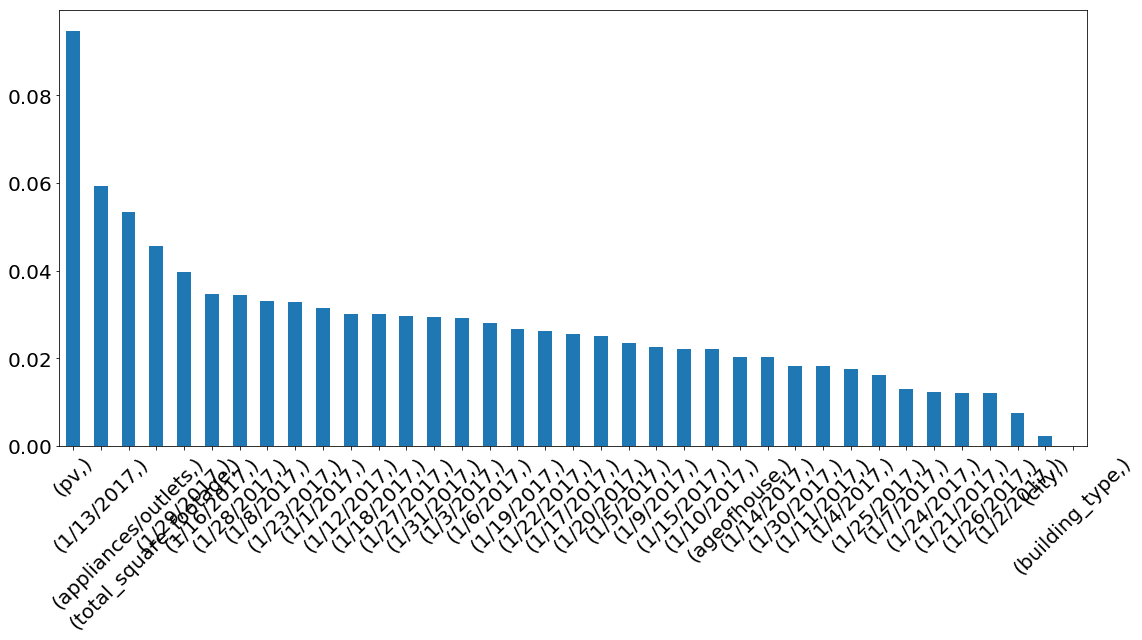

In [29]:

import matplotlib.pyplot as plt

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
# Implement me
f_importances = pd.Series(rf.feature_importances_, traindataframe.columns)

# Sort the array in descending order of the importances
# Implement me
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
#confusion matrix
#train
i = [0,1]

from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(y_resampled, trainpred)
print(cm)

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print(TN, FP, FN, TP)
#create recall, precision, F1, Sensitivyt and specificty from matrix

recall = TP/(TP+FN)
precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN)
Specificity = TN/ (TN+FP)
Accuracy = (TP + TN) / (TP + TN + FP + FN)
f1 = 2*((recall*precision)/(precision+recall))


print('recall is', recall)
print('precision is', precision)
print('sensitivity is', Sensitivity)
print('specificity is', Specificity)
print('Accuracy is', Accuracy)
print('f1 is', f1)

[[58  0]
 [ 0 58]]
58 0 0 58
recall is 1.0
precision is 1.0
sensitivity is 1.0
specificity is 1.0
Accuracy is 1.0
f1 is 1.0


In [39]:
#confusion matrix
#train
i = [0,1]

from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(y_test, testpred)
print(cm)

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print(TN, FP, FN, TP)
#create recall, precision, F1, Sensitivyt and specificty from matrix

recall = TP/(TP+FN)
precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN)
Specificity = TN/ (TN+FP)
Accuracy = (TP + TN) / (TP + TN + FP + FN)
f1 = 2*((recall*precision)/(precision+recall))


print('recall is', recall)
print('precision is', precision)
print('sensitivity is', Sensitivity)
print('specificity is', Specificity)
print('Accuracy is', Accuracy)
print('f1 is', f1)

[[78  0]
 [25  0]]
78 0 25 0
recall is 0.0
precision is nan
sensitivity is 0.0
specificity is 1.0
Accuracy is 0.7572815533980582
f1 is nan


C:\Users\Krystin\Anaconda3\envs\pecanpy-dev\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in longlong_scalars
